Extracting Dataset using Kaggle API

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/drive/MyDrive/disc/sentiment/my_dataset/all'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  2010


Printing the name of images

In [ ]:
file_names = os.listdir('/content/drive/MyDrive/disc/sentiment/my_dataset/all')
print(file_names)

['negative.784.jpg', 'positive.742.jpg', 'positive.2069.jpg', 'positive.1087.jpg', 'positive.1157.jpg', 'positive.707.jpg', 'negative.1940.jpg', 'positive.1183.jpg', 'negative.1739.jpg', 'positive.1545.jpg', 'positive.1195.jpg', 'positive.2379.jpg', 'positive.2052.jpg', 'negative.937.jpg', 'positive.1784.jpg', 'negative.2349.jpg', 'positive.1213.jpg', 'positive.670.jpg', 'positive.1440.jpg', 'positive.1733.jpg', 'positive.1139.jpg', 'positive.1178.jpg', 'negative.782.jpg', 'positive.2055.jpg', 'positive.1037.jpg', 'positive.912.jpg', 'positive.2424.jpg', 'positive.2074.jpg', 'positive.1633.jpg', 'negative.764.jpg', 'positive.847.jpg', 'positive.790.jpg', 'positive.1280.jpg', 'positive.1033.jpg', 'negative.1237.jpg', 'negative.152.jpg', 'positive.242.jpg', 'positive.1715.jpg', 'positive.2312.jpg', 'negative.1906.jpg', 'positive.1734.jpg', 'positive.2454.jpg', 'positive.1999.jpg', 'negative.917.jpg', 'negative.1577.jpg', 'positive.676.jpg', 'negative.1380.jpg', 'positive.1091.jpg', 'nega

Importing the Dependencies

In [ ]:
!ls "/content/drive/MyDrive/disc/sentiment/my_dataset/all"

negative.1054.jpg  negative.590.jpg   positive.1407.jpg  positive.1968.jpg  positive.340.jpg
negative.105.jpg   negative.592.jpg   positive.1410.jpg  positive.1969.jpg  positive.343.jpg
negative.1062.jpg  negative.593.jpg   positive.1411.jpg  positive.196.jpg   positive.344.jpg
negative.106.jpg   negative.594.jpg   positive.1412.jpg  positive.1971.jpg  positive.345.jpg
negative.1088.jpg  negative.597.jpg   positive.1413.jpg  positive.1972.jpg  positive.347.jpg
negative.108.jpg   negative.598.jpg   positive.1414.jpg  positive.1973.jpg  positive.348.jpg
negative.1133.jpg  negative.5.jpg     positive.1415.jpg  positive.1975.jpg  positive.351.jpg
negative.114.jpg   negative.600.jpg   positive.1416.jpg  positive.1976.jpg  positive.352.jpg
negative.1151.jpg  negative.604.jpg   positive.1419.jpg  positive.1977.jpg  positive.353.jpg
negative.1164.jpg  negative.606.jpg   positive.1420.jpg  positive.1979.jpg  positive.354.jpg
negative.1168.jpg  negative.607.jpg   positive.1422.jpg  positive.197.

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of positives

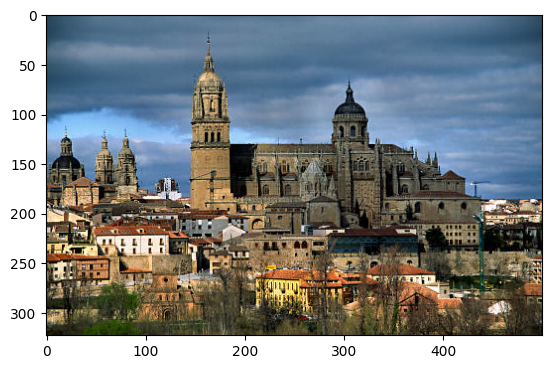

In [ ]:
# display dog image
img = mpimg.imread('/content/drive/MyDrive/disc/sentiment/my_dataset/all/positive.1400.jpg')
imgplt = plt.imshow(img)
plt.show()

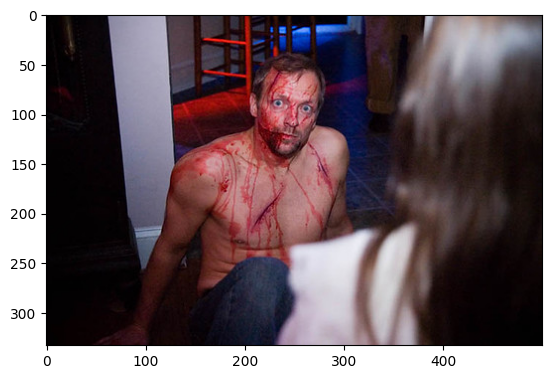

In [ ]:
# display cat image
img = mpimg.imread('/content/drive/MyDrive/disc/sentiment/my_dataset/all/negative.485.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/drive/MyDrive/disc/sentiment/my_dataset/all')

for i in range(5):

  name = file_names[i]
  print(name[0:8])



negative
positive
positive
positive
positive


In [ ]:
file_names = os.listdir('/content/drive/MyDrive/disc/sentiment/my_dataset/all')

pos_count = 0
neg_count = 0

for img_file in file_names:

  name = img_file[0:8]

  if name == 'positive':
    pos_count += 1

  else:
    neg_count += 1

print('Number of positive images =', pos_count)
print('Number of negative images =', neg_count)

Number of positive images = 1528
Number of negative images = 482


Resizing all the images

In [ ]:
#creating a directory for resized images
os.mkdir('/content/drive/MyDrive/disc/sentiment/my_dataset/resized')

FileExistsError: [Errno 17] File exists: '/content/drive/MyDrive/disc/sentiment/my_dataset/resized'

In [ ]:
original_folder = '/content/drive/MyDrive/disc/sentiment/my_dataset/all/'
resized_folder  = '/content/drive/MyDrive/disc/sentiment/my_dataset/resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/drive/MyDrive/disc/sentiment/my_dataset/resized'))
print(len(files))

2000


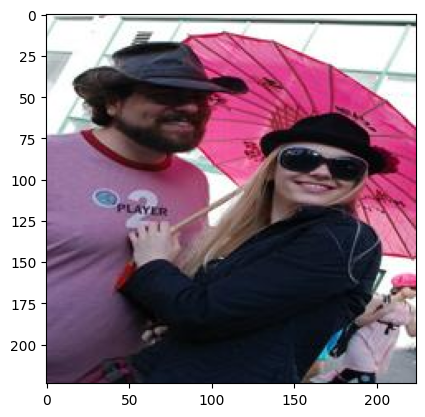

In [ ]:
# display resized dog image
img = mpimg.imread('/content/drive/MyDrive/disc/sentiment/my_dataset/resized/positive.138.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of positives and negatives**

Negative --> 0

Positive --> 1

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/drive/MyDrive/disc/sentiment/my_dataset/resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:8]

  if label == 'positive':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['positive.1249.jpg', 'positive.2342.jpg', 'positive.1668.jpg', 'positive.1618.jpg', 'positive.656.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[1, 1, 1, 1, 1]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 482 1518]


Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/drive/MyDrive/disc/sentiment/my_dataset/resized/'
image_extension = ['jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

pos_neg_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(pos_neg_images)

[[[[  4  28  26]
   [  4  28  26]
   [  5  29  27]
   ...
   [  6  31  27]
   [ 10  35  31]
   [  2  27  23]]

  [[ 18  42  40]
   [ 19  43  41]
   [ 20  44  42]
   ...
   [ 26  51  47]
   [ 29  54  50]
   [ 21  46  42]]

  [[ 22  46  44]
   [ 24  48  46]
   [ 26  50  48]
   ...
   [ 21  46  42]
   [ 24  49  45]
   [ 15  40  36]]

  ...

  [[ 11  29  30]
   [ 23  41  42]
   [ 22  40  41]
   ...
   [ 37  65  52]
   [ 36  64  51]
   [ 22  50  37]]

  [[ 16  34  35]
   [ 28  46  47]
   [ 27  45  46]
   ...
   [ 41  69  56]
   [ 40  68  55]
   [ 26  54  41]]

  [[  0  15  16]
   [  9  27  28]
   [  8  26  27]
   ...
   [ 13  41  28]
   [ 12  40  27]
   [  0  27  14]]]


 [[[235 247 217]
   [237 249 219]
   [242 251 225]
   ...
   [202 223 190]
   [198 219 186]
   [194 215 182]]

  [[234 246 216]
   [235 247 217]
   [240 249 222]
   ...
   [206 227 194]
   [203 224 191]
   [200 221 188]]

  [[234 246 216]
   [235 247 217]
   [238 247 220]
   ...
   [212 233 200]
   [208 229 196]
   [206 227

In [ ]:
type(pos_neg_images)

numpy.ndarray

In [ ]:
print(pos_neg_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = pos_neg_images
Y = np.asarray(labels)

**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.11764706 0.1254902  0.16470588]
   [0.11764706 0.1254902  0.16470588]
   [0.12156863 0.12941176 0.16862745]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]]

  [[0.11764706 0.1254902  0.16470588]
   [0.11764706 0.1254902  0.16470588]
   [0.12156863 0.12941176 0.16862745]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]]

  [[0.11764706 0.1254902  0.16470588]
   [0.11764706 0.1254902  0.16470588]
   [0.12156863 0.12941176 0.16862745]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]]

  ...

  [[0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   ...
   [0.00784314 0.00784314 0.00784314]
   [0.00784314 0.00784314 0.00784314]
   [0.00784314 0.00784314 0.00784314]]

  [[0.00392157 0.00392157 0.00392157]
   [0.0

**Building the Neural Network**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
#delete later
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=2,  restore_best_weights=True)
history2 = model.fit(X_train_scaled, Y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[es])

#history3=model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
40/40 [==============================] - 77s 2s/step - loss: 0.9726 - accuracy: 0.6938 - val_loss: 0.6876 - val_accuracy: 0.7312
Epoch 2/10
40/40 [==============================] - 68s 2s/step - loss: 0.6886 - accuracy: 0.7453 - val_loss: 0.6864 - val_accuracy: 0.7375
Epoch 3/10
40/40 [==============================] - 59s 1s/step - loss: 0.8767 - accuracy: 0.7570 - val_loss: 0.6893 - val_accuracy: 0.6844
Epoch 4/10
40/40 [==============================] - 68s 2s/step - loss: 0.6928 - accuracy: 0.5375 - val_loss: 0.6923 - val_accuracy: 0.4156


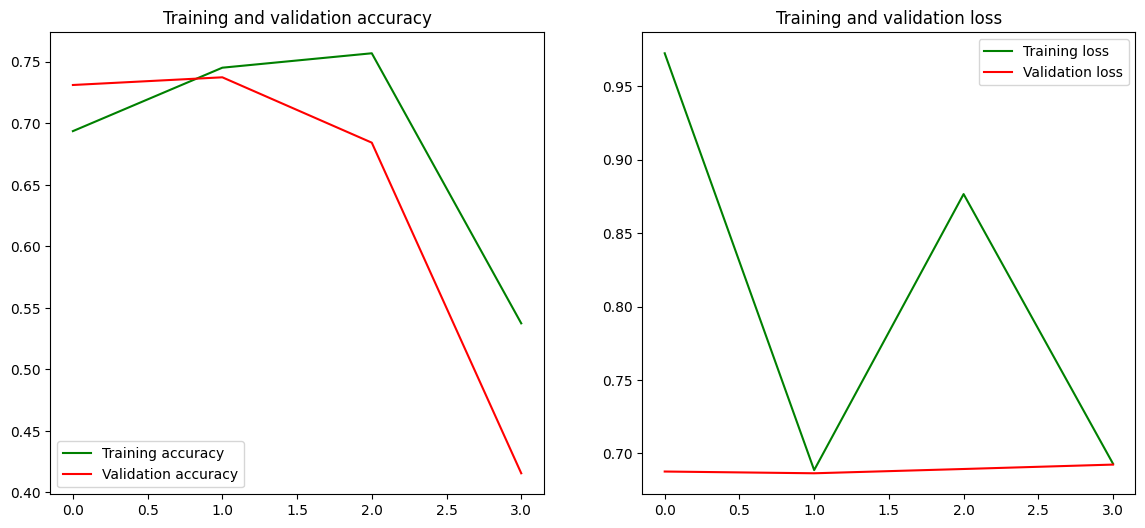

In [ ]:
#delete later
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(history2)

In [ ]:
#delete later
model.evaluate(X_test, Y_test)

13/13 [==============================] - 15s 1s/step - loss: 0.7367 - accuracy: 0.7400


[0.736673891544342, 0.7400000095367432]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.6733975410461426
Validation accuracy: 0.7524999976158142


In [ ]:
y_predict = np.argmax(model.predict(X_test), axis=-1)

13/13 [==============================] - 21s 2s/step


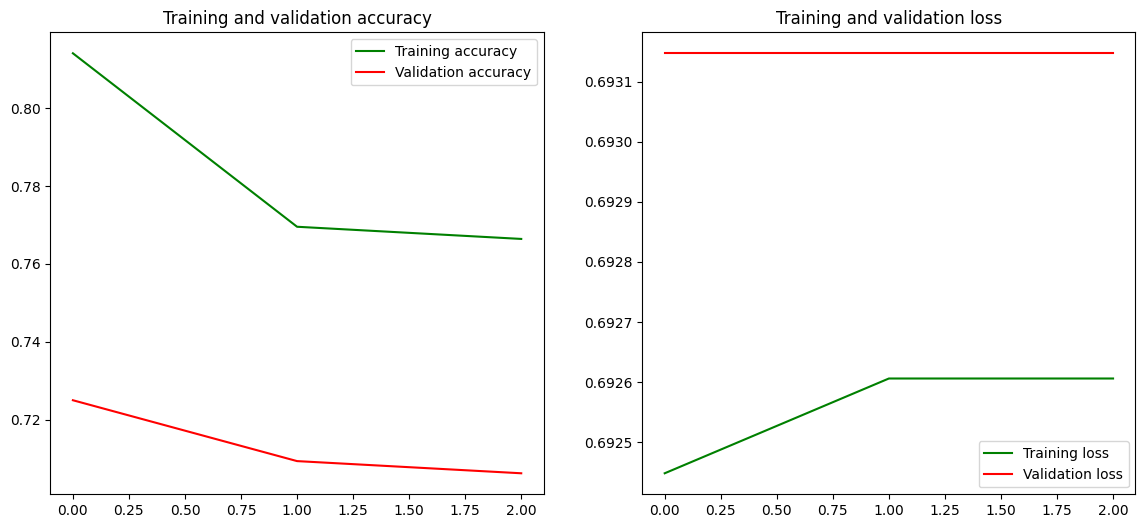

In [ ]:
#delete later
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(history2)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 66s 1s/step - loss: 0.6659 - acc: 0.7138
Epoch 2/5
 5/50 [==>...........................] - ETA: 59s - loss: 0.4566 - acc: 0.8062 

KeyboardInterrupt: 

In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 15s 1s/step - loss: 0.4737 - acc: 0.7975
Test Loss = 0.4737190902233124
Test Accuracy = 0.7975000143051147


**Predictive System**

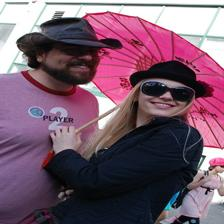

1/1 [==============================] - 1s 610ms/step
[[-0.76284665  1.5731297 ]]
1
The image is positive


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image is negative')

else:
  print('The image is positive')

# **VGG 16**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

train_ds = preprocess_input(X_train)
test_ds = preprocess_input(X_test)

base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
base_model.trainable = False


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras import layers, models


flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')



model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_5 (Dense)             (None, 50)                1254450   
                                                                 
 dense_6 (Dense)             (None, 20)                1020      
                                                                 
 dense_7 (Dense)             (None, 2)                 42        
                                                                 
Total params: 15970200 (60.92 MB)
Trainable params: 1255512 (4.79 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
size = (150, 150)

train_ds = tf.image.resize(X_train, (224, 224))
test_ds = tf.image.resize(X_test, (224, 224))

#train_labels = to_categorical(Y_train, num_classes=2)
#test_labels = to_categorical(Y_test, num_classes=2)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=2,  restore_best_weights=True)

model.fit(train_ds, Y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/10
40/40 [==============================] - 948s 24s/step - loss: 2.1858 - accuracy: 0.7125 - val_loss: 1.5012 - val_accuracy: 0.7375
Epoch 2/10
40/40 [==============================] - 941s 24s/step - loss: 0.3724 - accuracy: 0.9156 - val_loss: 1.2985 - val_accuracy: 0.8062
Epoch 3/10
40/40 [==============================] - 945s 24s/step - loss: 0.0502 - accuracy: 0.9844 - val_loss: 1.3154 - val_accuracy: 0.8188
Epoch 4/10
40/40 [==============================] - 982s 25s/step - loss: 0.0075 - accuracy: 0.9984 - val_loss: 1.2162 - val_accuracy: 0.8000
Epoch 5/10
40/40 [==============================] - 940s 24s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.2233 - val_accuracy: 0.8062


In [ ]:
model.evaluate(test_ds, Y_test)

13/13 [==============================] - 231s 18s/step - loss: 1.7593 - accuracy: 0.7725


[1.7593189477920532, 0.7724999785423279]

In [ ]:
%mkdir '/content/drive/MyDrive/disc/sentiment/my_dataset/vgg_resized'
original_folder = '/content/drive/MyDrive/disc/sentiment/my_dataset/all/'
resized_folder  = '/content/drive/MyDrive/disc/sentiment/my_dataset/vgg_resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((150, 150))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

mkdir: cannot create directory ‘/content/drive/MyDrive/disc/sentiment/my_dataset/vgg_resized’: File exists


In [ ]:
path, dirs, files = next(os.walk('/content/drive/MyDrive/disc/sentiment/my_dataset/vgg_resized'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  2000


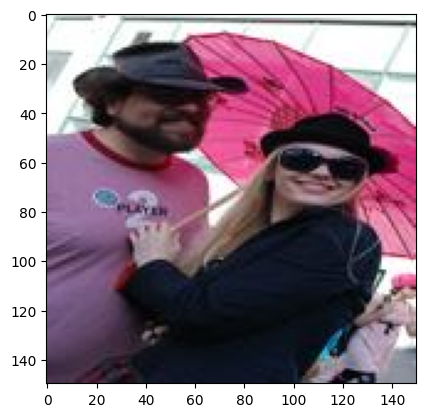

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/disc/sentiment/my_dataset/vgg_resized/positive.138.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
print(labels[0:5])
print(len(labels))

[1, 1, 1, 0, 1]
2000


In [ ]:
image_directory = '/content/drive/MyDrive/disc/sentiment/my_dataset/vgg_resized/'
image_extension = ['jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

pos_neg_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
type(pos_neg_images)

In [ ]:
X = pos_neg_images
Y = np.asarray(labels)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

In [ ]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255